# 🎬 Movie Sentiment Analysis

A project that analyzes movie reviews to predict whether the sentiment is **Positive** or **Negative**, as **Task 1** of the **Elevvo NLP Training Program**.

---

In [42]:
# importing Liraries

# Data handling
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# NLP & Text preprocessing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Model training & evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Load & Explore Data

In [43]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [45]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [46]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [47]:
df['review_length'] = df['review'].apply(len)
df['review_length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

---

### Text Preprocessing

In [48]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)


In [49]:
# Apply cleaning function to the reviews column
df['clean_review'] = df['review'].apply(clean_text)

In [50]:
# Show sample
df[['review', 'clean_review']].head()

,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [51]:
print(df['review'][0])

print("\nCleaned:\n", df['clean_review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

---

### Text Representation (Feature Extraction)

In [52]:
# Define vectorizers
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X_count = count_vectorizer.fit_transform(df['clean_review'])
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_review'])

# Encode target labels (Positive=1, Negative=0)
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
y = df['sentiment']


In [53]:
# Split data into training and testing sets

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("TF-IDF features shape:", X_train_tfidf.shape)


TF-IDF features shape: (40000, 5000)


---

### Model Training

In [56]:
#  Train Logistic Regression
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_tfidf, y_train)

#  Train Naive Bayes (Bonus)
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# ✅ Predictions for both models (needed later for evaluation)
y_pred_log = log_model.predict(X_test_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)


---

### Evaluation

🎯 Logistic Regression Performance
Accuracy: 0.8863
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



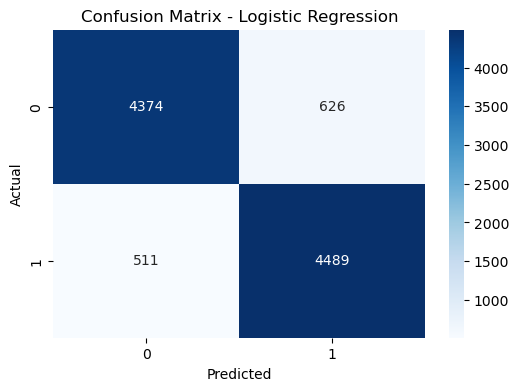

In [57]:
# --- Logistic Regression ---

print("🎯 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🎯 Naive Bayes Performance
Accuracy: 0.8524
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



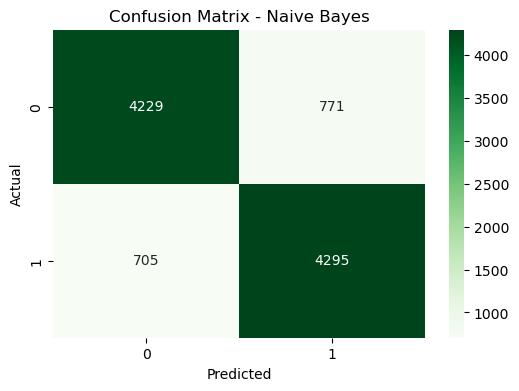

In [58]:
# --- Naive Bayes ---

print("🎯 Naive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [59]:
# --- Compare Results ---
print("\n🏁 Accuracy Comparison:")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"Naive Bayes:        {accuracy_nb:.4f}")



🏁 Accuracy Comparison:
Logistic Regression: 0.8863
Naive Bayes:        0.8524


---

### Save Model & Vectorizer

In [60]:
import joblib
import os

# Create directory if not exists
os.makedirs("models", exist_ok=True)

# Save the best model (Logistic Regression)
joblib.dump(log_reg, "models/sentiment_model.pkl")
joblib.dump(tfidf_vectorizer, "models/tfidf_vectorizer.pkl")

print("✅ Best model (Logistic Regression) and TF-IDF vectorizer saved successfully!")


✅ Best model (Logistic Regression) and TF-IDF vectorizer saved successfully!


---

### Visualization

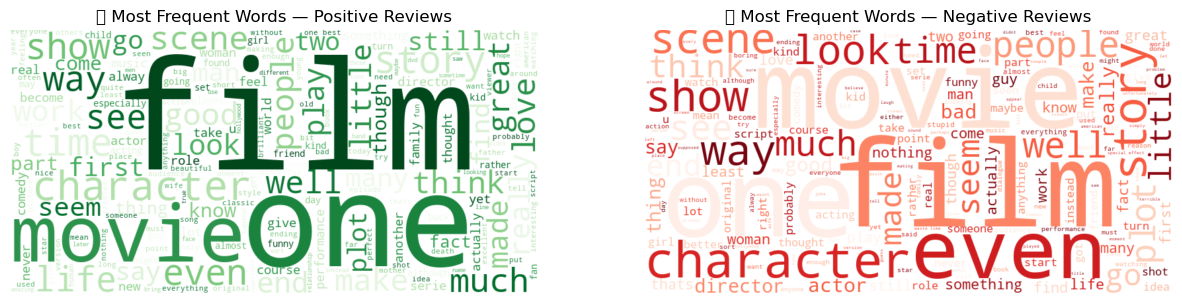

In [61]:
# WordClouds

# Separate positive and negative reviews
positive_text = " ".join(df[df['sentiment'] == 1]['clean_review'])
negative_text = " ".join(df[df['sentiment'] == 0]['clean_review'])

# Generate WordClouds
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Display WordClouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title("🌟 Most Frequent Words — Positive Reviews")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title("💔 Most Frequent Words — Negative Reviews")
plt.axis('off')

plt.show()


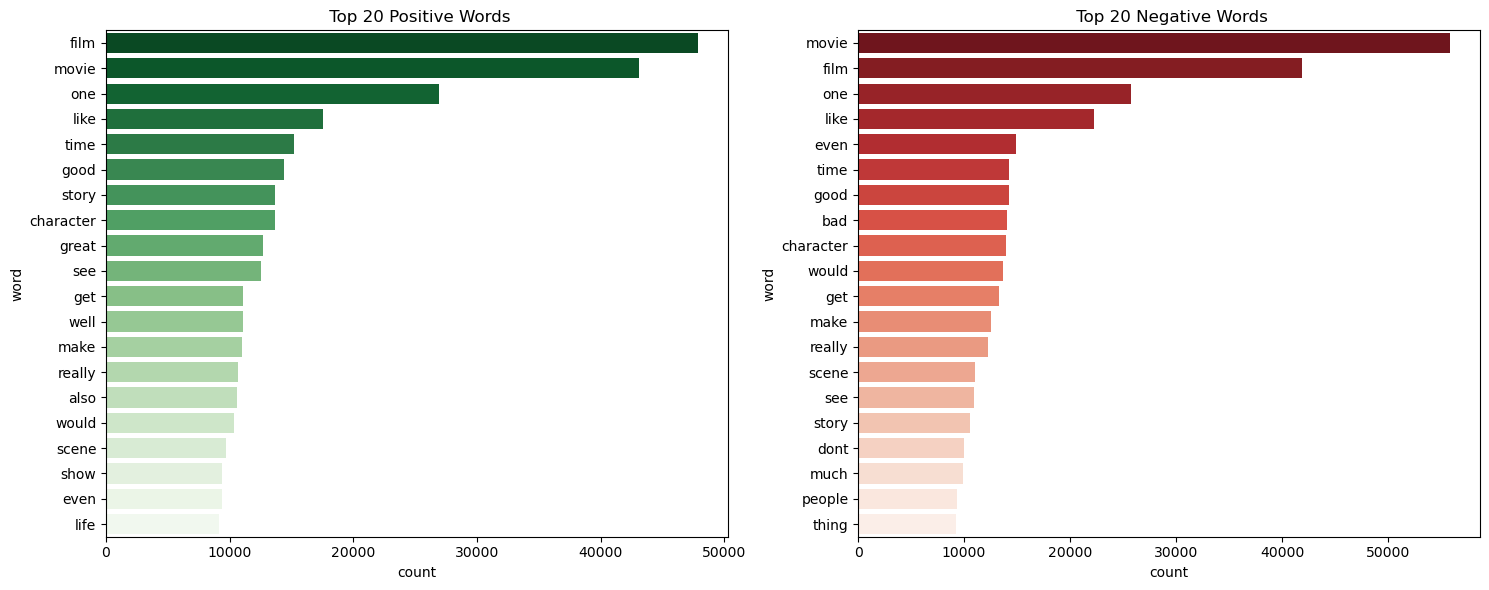

In [65]:
# Bonus — Top 20 Frequent Words (per sentiment)

from collections import Counter

# Tokenize reviews
positive_words = " ".join(df[df['sentiment'] == 1]['clean_review']).split()
negative_words = " ".join(df[df['sentiment'] == 0]['clean_review']).split()

# Count most common words
pos_common = Counter(positive_words).most_common(20)
neg_common = Counter(negative_words).most_common(20)

# Convert to DataFrame for visualization
pos_df = pd.DataFrame(pos_common, columns=['word', 'count'])
neg_df = pd.DataFrame(neg_common, columns=['word', 'count'])

# Plot
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(y='word', x='count', data=pos_df, palette='Greens_r')
plt.title(" Top 20 Positive Words")

plt.subplot(1,2,2)
sns.barplot(y='word', x='count', data=neg_df, palette='Reds_r')
plt.title(" Top 20 Negative Words")

plt.tight_layout()
plt.show()


---


### 🎉 Hooray!  
Task 1 — Sentiment Analysis ✅ Completed Successfully  

On to the next one 🚀✨
